<a href="https://colab.research.google.com/github/dhanushkasisil2700/stack_overflow_data_analysis/blob/main/Copy_of_main_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [3]:
od.download("stackoverflow-developer-survey-2020")

94609408it [00:03, 25690323.16it/s]                               


16384it [00:00, 67534.85it/s]           


8192it [00:00, 60956.22it/s]            


In [4]:
survey_df = pd.read_csv("stackoverflow-developer-survey-2020/survey_results_public.csv")
schema_df = pd.read_csv("stackoverflow-developer-survey-2020/survey_results_schema.csv")

In [5]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

## **Developer Roles**

In [6]:
survey_df["DevType"].unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

**Function for split multi responses columns**

In [7]:
def split_multi_responses(multi_responses):
  result_df = pd.DataFrame(index=multi_responses.index)
  options = []

  for indx, value in multi_responses.items():
    if pd.notnull(value):
      for option in value.split(';'):
        if option not in options:
          options.append(option)
          result_df[option] = False
        result_df.at[indx, option] = True
  return result_df[options]

In [8]:
dev_role_df = split_multi_responses(survey_df["DevType"])
dev_roles = dev_role_df.sum().sort_values(ascending=False)

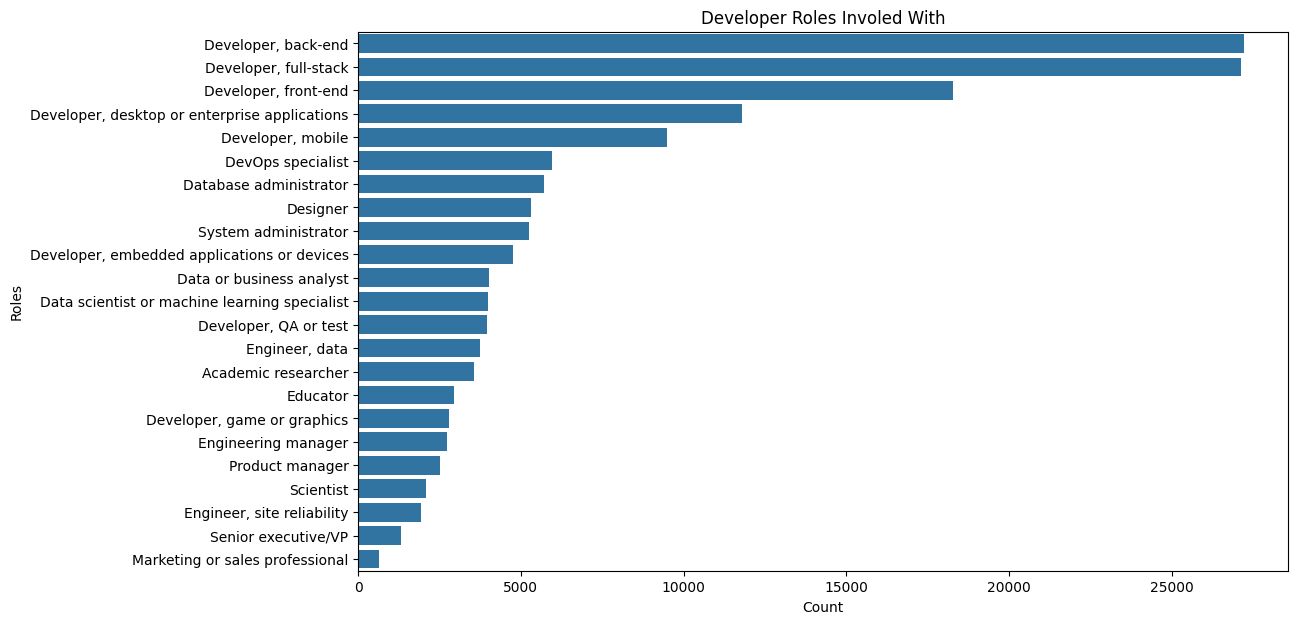

In [9]:
plt.figure(figsize=(12, 7))
sns.barplot(x=dev_roles.values, y=dev_roles.index)
plt.title("Developer Roles Involed With")
plt.xlabel("Count")
plt.ylabel("Roles")
plt.show()

In [10]:
dev_roles_per = dev_roles*100 / dev_roles.sum()

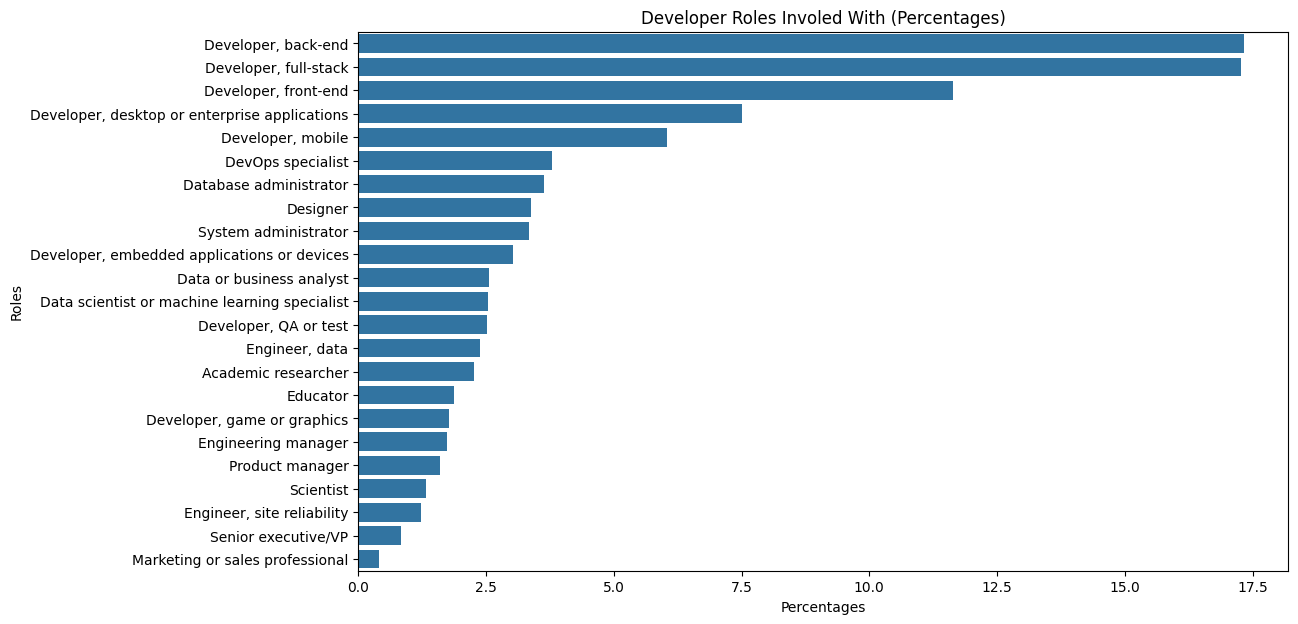

In [11]:
plt.figure(figsize=(12, 7))
sns.barplot(x=dev_roles_per.values, y=dev_roles_per.index)
plt.title("Developer Roles Involed With (Percentages)")
plt.xlabel("Percentages")
plt.ylabel("Roles")
plt.show()

**Coding as a Hobby**

In [12]:
hobbyist = survey_df["Hobbyist"].value_counts(dropna=False)
hobbyist_per = hobbyist*100/hobbyist.sum()

<function matplotlib.pyplot.show(close=None, block=None)>

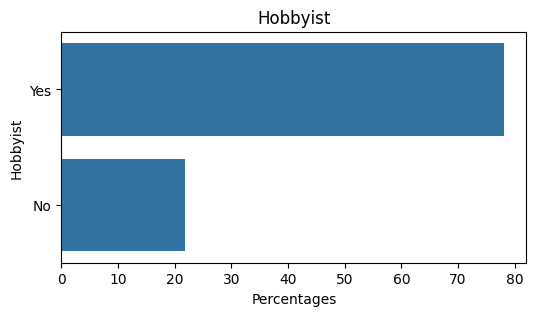

In [13]:
plt.figure(figsize=(6, 3))
sns.barplot(y=hobbyist_per.index, x=hobbyist_per.values)
plt.title("Hobbyist")
plt.ylabel("Hobbyist")
plt.xlabel("Percentages")
plt.show

## **Experience**

**Years Since Learning to Code**

In [14]:
survey_df["YearsCode"].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [15]:
years_code = survey_df["YearsCode"]
years_code = years_code.replace("More than 50 years", 51)
years_code = years_code.replace("Less than 1 year", 0.5)
years_code = years_code.astype(float)

<ipython-input-16-0ae2dcf81418>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(years_code, bins=np.arange(0, 52, 1))


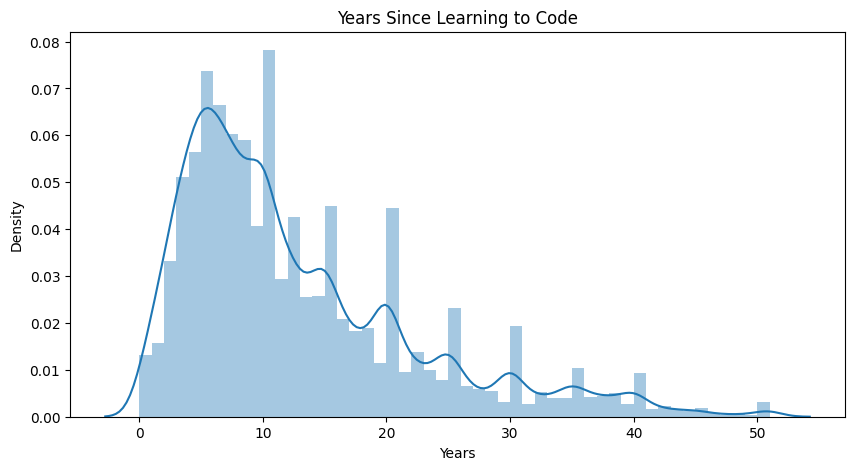

In [16]:
plt.figure(figsize=(10, 5))
sns.distplot(years_code, bins=np.arange(0, 52, 1))
plt.title("Years Since Learning to Code")
plt.xlabel("Years")
plt.show()

**Distribution of Years Coding Professionally**

In [17]:
survey_df["YearsCodePro"].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [18]:
years_code_pro = survey_df["YearsCodePro"]
years_code_pro = years_code_pro.replace("More than 50 years", 51)
years_code_pro = years_code_pro.replace("Less than 1 year", 0.5)
years_code_pro = years_code_pro.astype(float)

<ipython-input-19-4217670477c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(years_code_pro, bins=np.arange(0, 52, 1))


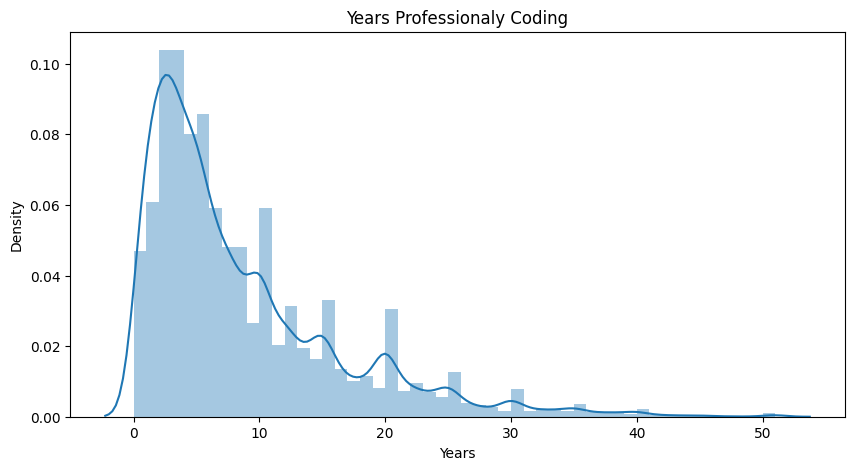

In [19]:
plt.figure(figsize=(10, 5))
sns.distplot(years_code_pro, bins=np.arange(0, 52, 1))
plt.title("Years Professionaly Coding")
plt.xlabel("Years")
plt.show()

**Years of Professional Coding Experience by Developer Type**

In [20]:
dev_role_df["YearsCodePro"] = years_code_pro
dev_role_df.head()

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional,YearsCodePro
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,27.0
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4.0
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,NaN
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4.0
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,8.0


In [21]:
dev_role_df[dev_role_df["Developer, full-stack"]==1]["YearsCodePro"].mean()

8.671170284003624

In [22]:
dev_roles = dev_role_df.columns[:-1]
dev_roles_count_years = pd.DataFrame(columns=("Role", "Count"))
i = 0

for role in dev_roles:
  mean = dev_role_df[dev_role_df[role]==1]["YearsCodePro"].mean()
  dev_roles_count_years.loc[i] = [role, mean]
  i = i+1


Text(0, 0.5, 'Role')

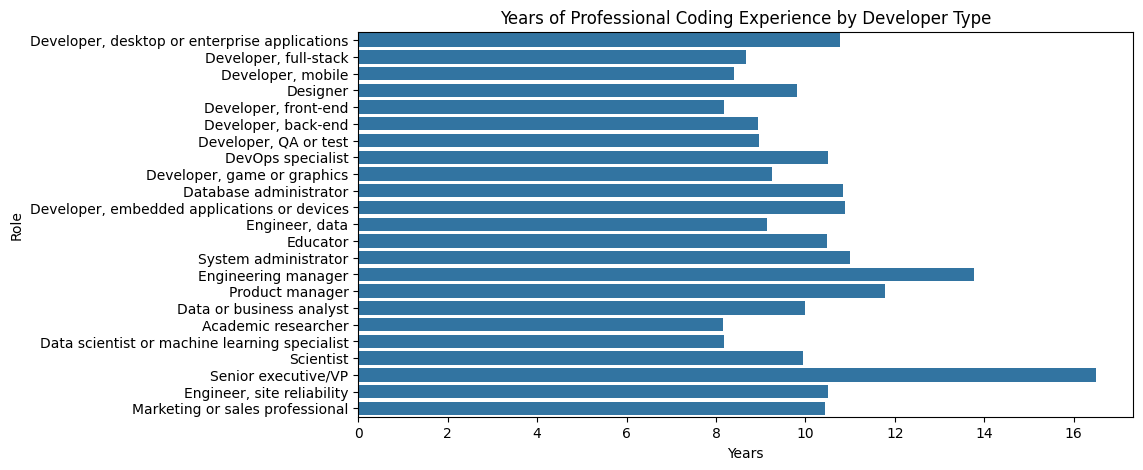

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Count", y="Role", data=dev_roles_count_years)
plt.title("Years of Professional Coding Experience by Developer Type")
plt.xlabel("Years")
plt.ylabel("Role")

**Writing That First Line of Code**

In [24]:
survey_df["Age1stCode"].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [25]:
age1st_code = survey_df["Age1stCode"]
age1st_code = age1st_code.replace("Older than 85", 90)
age1st_code = age1st_code.replace("Younger than 5 years", 2.5)
age1st_code = age1st_code.astype(float)

<ipython-input-26-795c41d2625b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age1st_code, bins=np.arange(0, 91, 1))


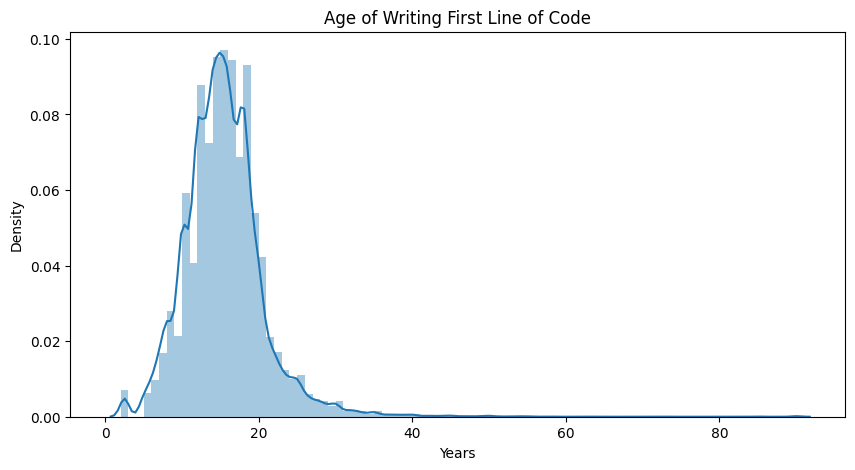

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(age1st_code, bins=np.arange(0, 91, 1))
plt.title("Age of Writing First Line of Code")
plt.xlabel("Years")
plt.show()

## **Salary**

**Distribution of Salary**

In [27]:
comp_total = survey_df["ConvertedComp"]

<ipython-input-28-0b17ce002927>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comp_total)


Text(0.5, 0, 'Salary')

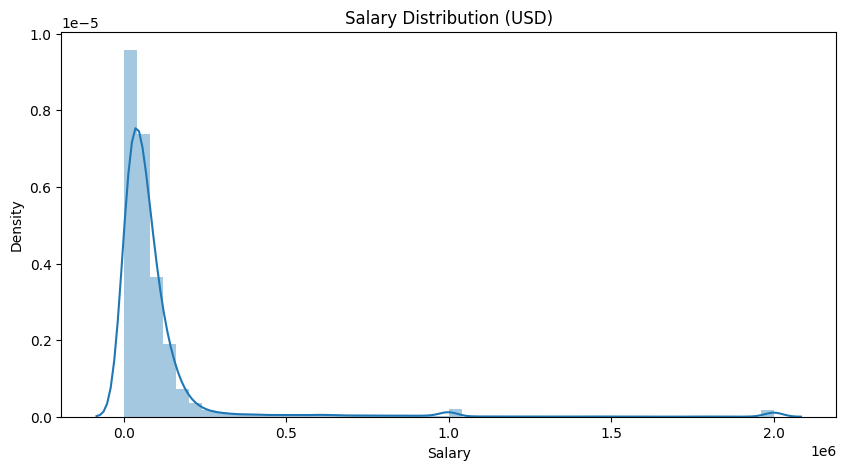

In [28]:
plt.figure(figsize=(10, 5))
sns.distplot(comp_total)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")

**Destribution of Salary in USA (USD)**

In [29]:
comp_total_us = survey_df[survey_df["Country"] == "United States"]["ConvertedComp"]

<ipython-input-30-80beaaecbfb0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comp_total_us)


Text(0.5, 0, 'Salary')

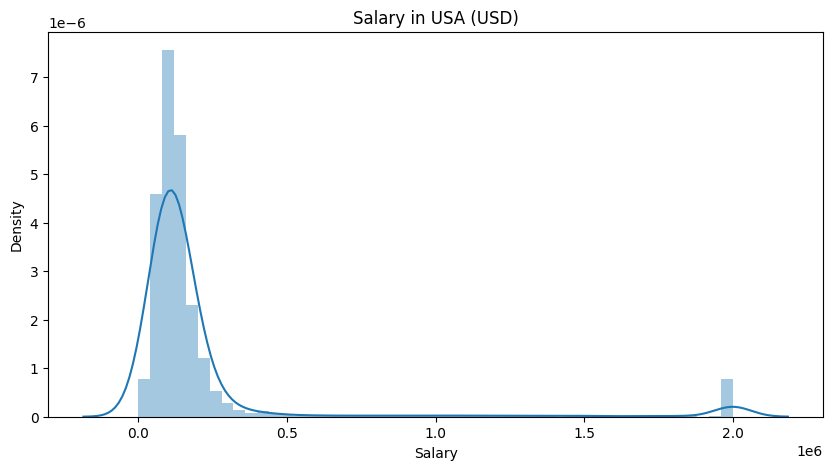

In [30]:
plt.figure(figsize=(10, 5))
sns.distplot(comp_total_us)
plt.title("Salary in USA (USD)")
plt.xlabel("Salary")

Text(0.5, 0, 'Salary')

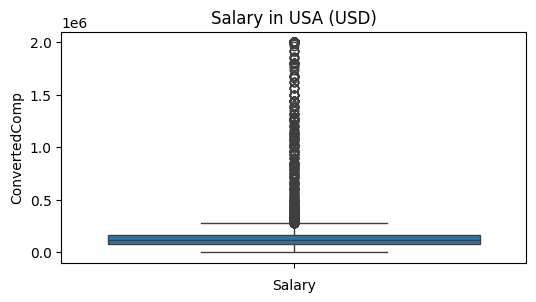

In [31]:
plt.figure(figsize=(6, 3))
sns.boxplot(comp_total_us)
plt.title("Salary in USA (USD)")
plt.xlabel("Salary")

**Distribution of Salary in Sri Lanka**

In [32]:
comp_total_sl = survey_df[survey_df["Country"] == "Sri Lanka"]["ConvertedComp"]

<ipython-input-33-ece80c1355a6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comp_total_sl)


Text(0.5, 0, 'Salary')

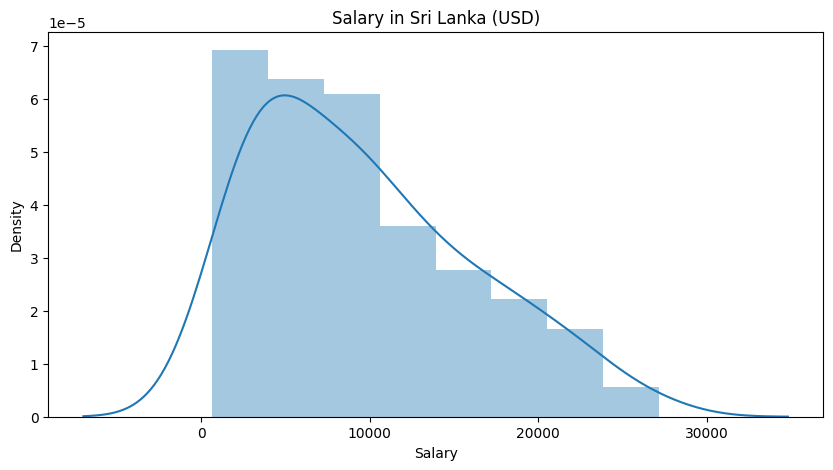

In [33]:
plt.figure(figsize=(10, 5))
sns.distplot(comp_total_sl)
plt.title("Salary in Sri Lanka (USD)")
plt.xlabel("Salary")

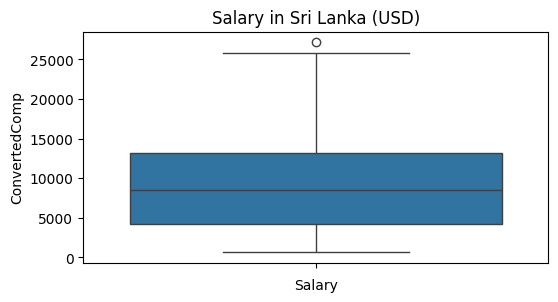

In [34]:
plt.figure(figsize=(6,3))
sns.boxplot(comp_total_sl)
plt.title("Salary in Sri Lanka (USD)")
plt.xlabel("Salary")
plt.show()

**Salary Destribution Around the Countries**

In [35]:
salary_country = survey_df.groupby("Country")["ConvertedComp"].mean().sort_values(ascending=False).head(20)

Text(0, 0.5, 'Country')

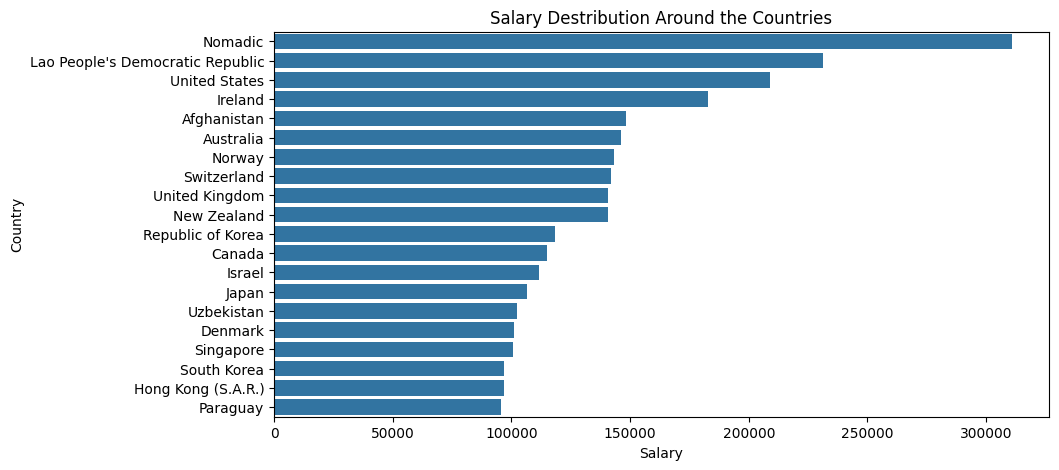

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(x=salary_country.values, y=salary_country.index)
plt.title("Salary Destribution Around the Countries")
plt.xlabel("Salary")
plt.ylabel("Country")

Distribution of Currency Use

In [37]:
use_curr = survey_df["CurrencyDesc"].value_counts().sort_values(ascending=False).head(15)

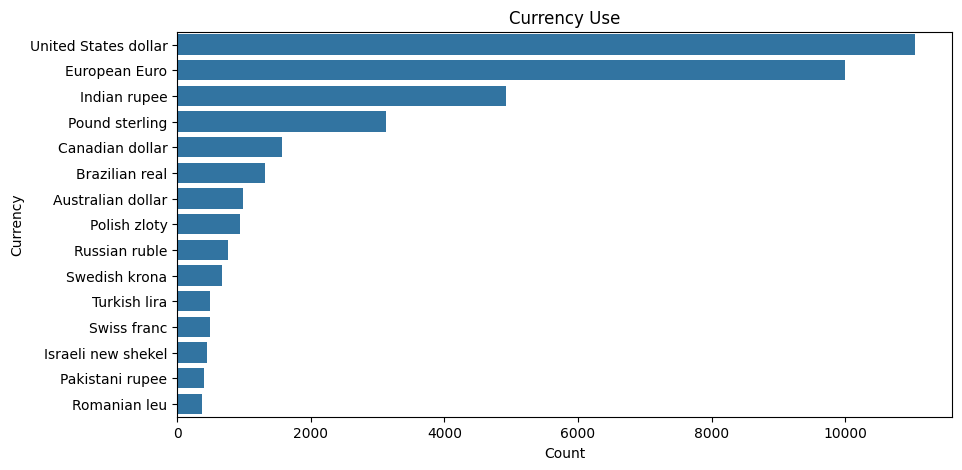

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x=use_curr.values, y=use_curr.index)
plt.title("Currency Use")
plt.xlabel("Count")
plt.ylabel("Currency")
plt.show()

**Salary Distribution with Years of Professional Experience**

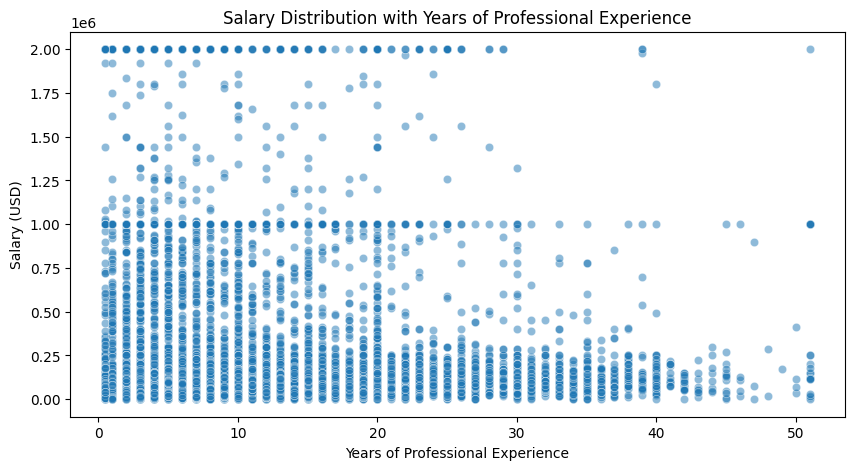

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=years_code_pro, y=comp_total, alpha=0.5)
plt.xlabel("Years of Professional Experience")
plt.ylabel("Salary (USD)")
plt.ylim()
plt.title("Salary Distribution with Years of Professional Experience")
plt.show()

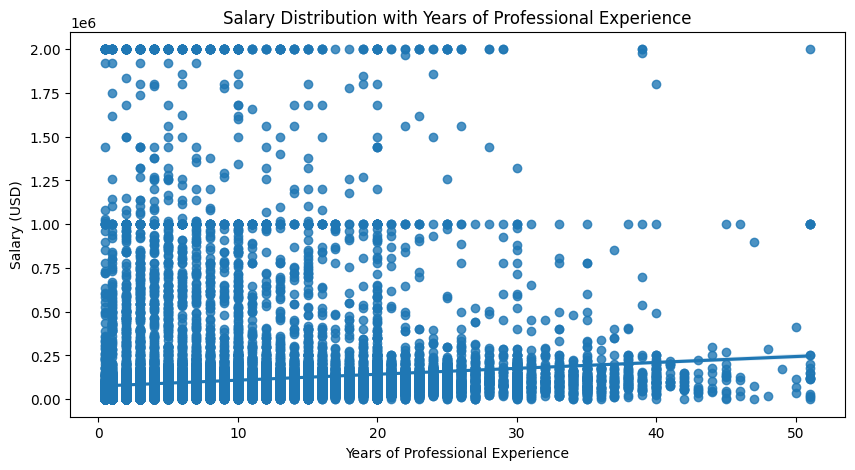

In [40]:
plt.figure(figsize=(10,5))
sns.regplot(x=years_code_pro, y=comp_total)
plt.xlabel("Years of Professional Experience")
plt.ylabel("Salary (USD)")
plt.ylim()
plt.title("Salary Distribution with Years of Professional Experience")
plt.show()

**Salary Distribution with Years of Professional Experience in Sri Lanka**

In [41]:
salary_sl = survey_df[survey_df["Country"] == "Sri Lanka"][["ConvertedComp", "YearsCodePro"]]
salary_sl["YearsCodePro"] = salary_sl["YearsCodePro"].replace("More than 50 years", 51)
salary_sl["YearsCodePro"] = salary_sl["YearsCodePro"].replace("Less than 1 year", 0.5)
salary_sl["YearsCodePro"] = salary_sl["YearsCodePro"].astype(float)

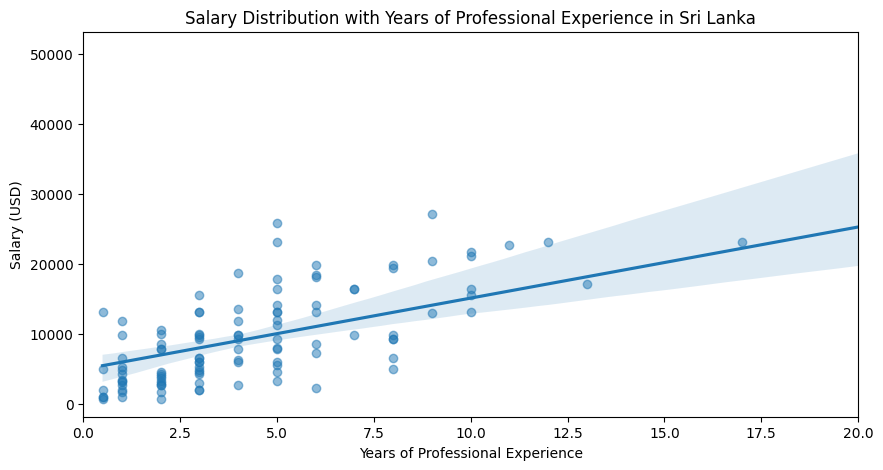

In [42]:
plt.figure(figsize=(10, 5))
# sns.scatterplot(x=salary_sl["YearsCodePro"], y=salary_sl["ConvertedComp"], alpha=0.5)
sns.regplot(x=salary_sl["YearsCodePro"], y=salary_sl["ConvertedComp"], scatter_kws={'alpha':0.5})
plt.xlabel("Years of Professional Experience")
plt.ylabel("Salary (USD)")
plt.xlim(0,20)
plt.title("Salary Distribution with Years of Professional Experience in Sri Lanka")
plt.show()

## **Education**

In [43]:
ed_level = survey_df["EdLevel"].value_counts()
ed_level_per = ed_level *100 / ed_level.sum()

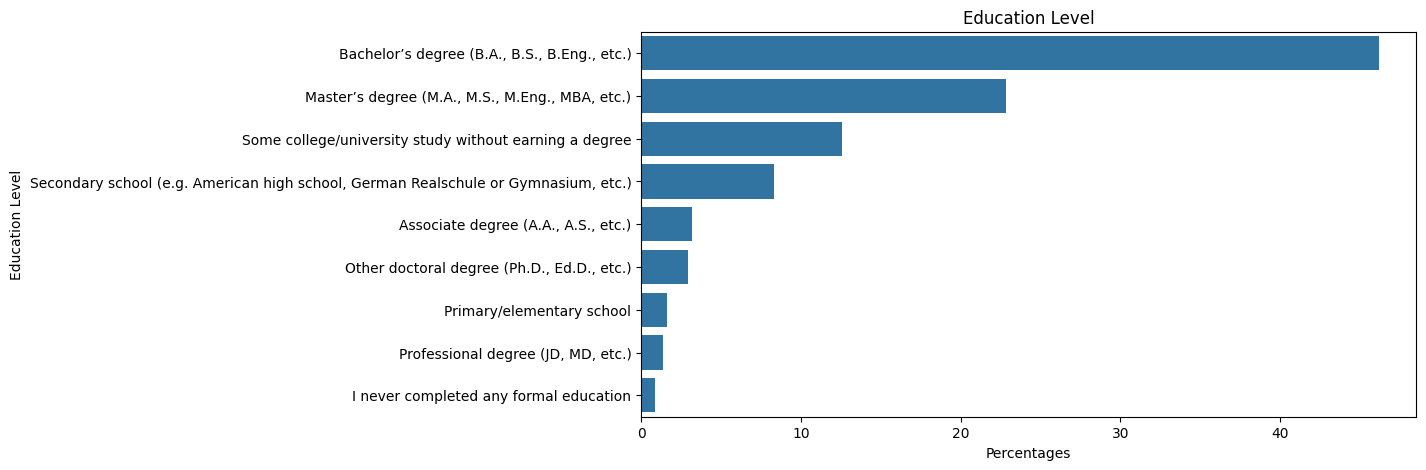

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x=ed_level_per.values, y=ed_level_per.index)
plt.title("Education Level")
plt.xlabel("Percentages")
plt.ylabel("Education Level")
plt.show()

**Education Gender Wise**

In [45]:
genders = survey_df["Gender"].unique()

In [46]:
survey_df["Gender"] = survey_df["Gender"].replace({x:"Not Confirmed" for x in genders[3:]})

In [63]:
ed_level_man = survey_df[survey_df["Gender"] == "Man"]["EdLevel"].value_counts()
ed_level_man = ed_level_man*100/ed_level_man.sum()

ed_level_woman = survey_df[survey_df["Gender"] == "Woman"]["EdLevel"].value_counts()
ed_level_woman = ed_level_woman*100/ed_level_woman.sum()
ed_level_woman = ed_level_woman.reindex(ed_level_man.index)

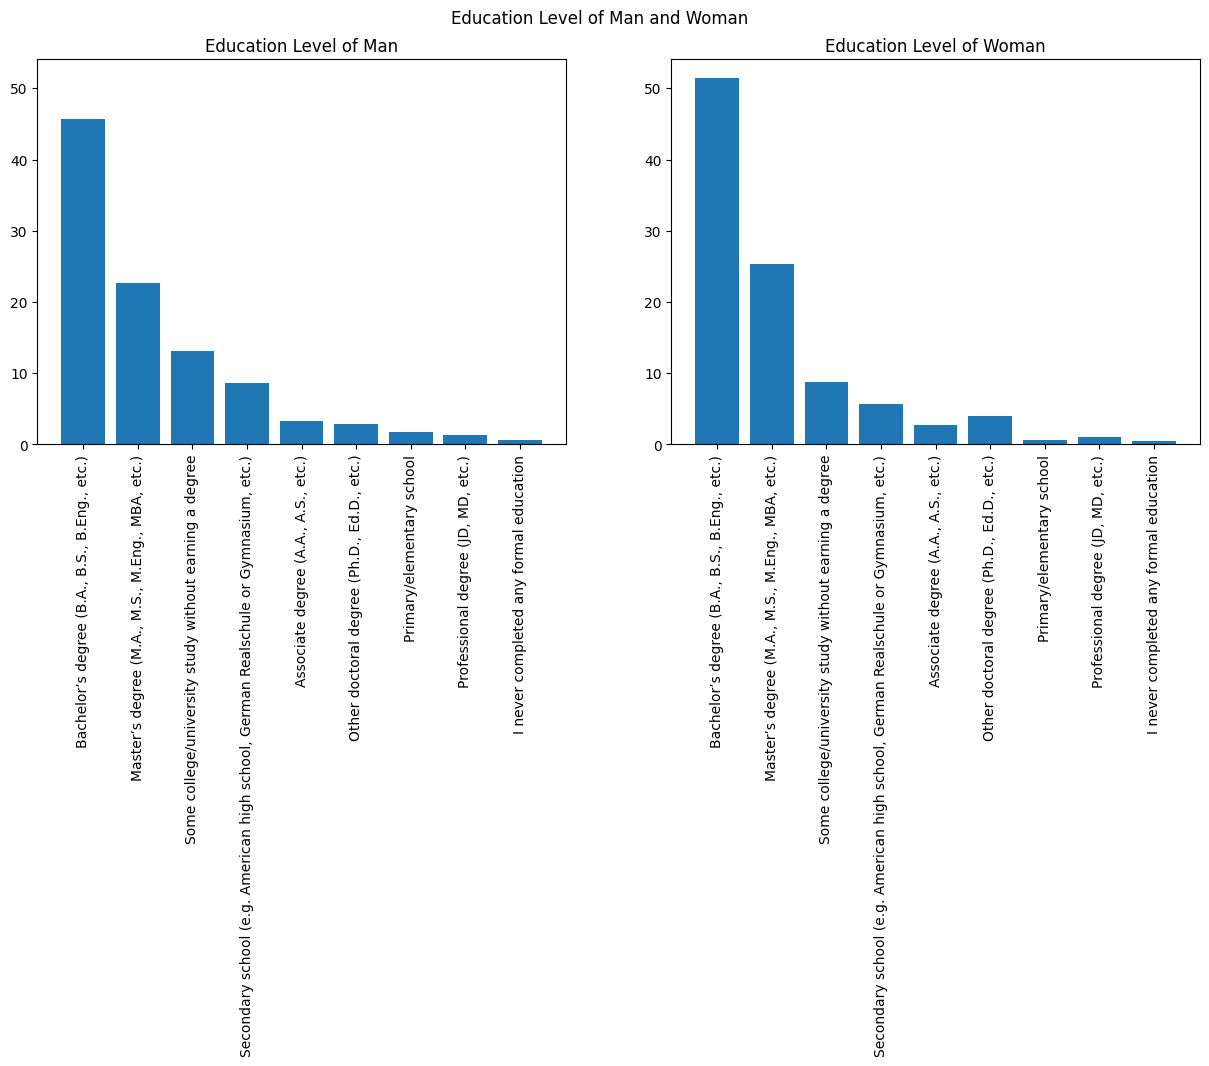

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Education Level of Man and Woman")

ax1.bar(ed_level_man.index, ed_level_man.values)
ax1.set_title("Education Level of Man")
ax1.xaxis.set_tick_params(rotation=90)

ax2.bar(ed_level_woman.index, ed_level_woman.values)
ax2.set_title("Education Level of Woman")
ax2.xaxis.set_tick_params(rotation=90)

ax1.set_ylim(ax2.get_ylim())

plt.show()

**Undergraduate Major**

In [49]:
undergrad_major = survey_df["UndergradMajor"].value_counts()
undergrad_major = undergrad_major *100 / undergrad_major.sum()

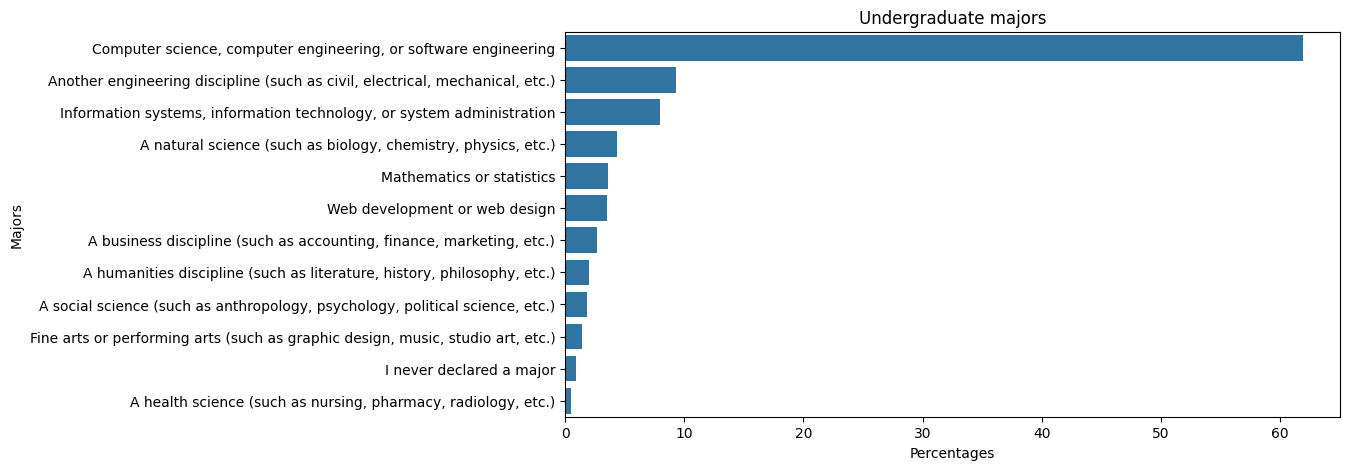

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x=undergrad_major.values, y=undergrad_major.index)
plt.title("Undergraduate majors")
plt.xlabel("Percentages")
plt.ylabel("Majors")
plt.show()

**Undergraduate Major Woman vs Man**

In [61]:
undergrad_man = survey_df[survey_df["Gender"] == "Man"]["UndergradMajor"].value_counts()
undergrad_man = undergrad_man*100/undergrad_man.sum()

undergrad_woman = survey_df[survey_df["Gender"] == "Woman"]["UndergradMajor"].value_counts()
undergrad_woman = undergrad_woman*100/undergrad_woman.sum()
undergrad_woman = undergrad_woman.reindex(undergrad_man.index)

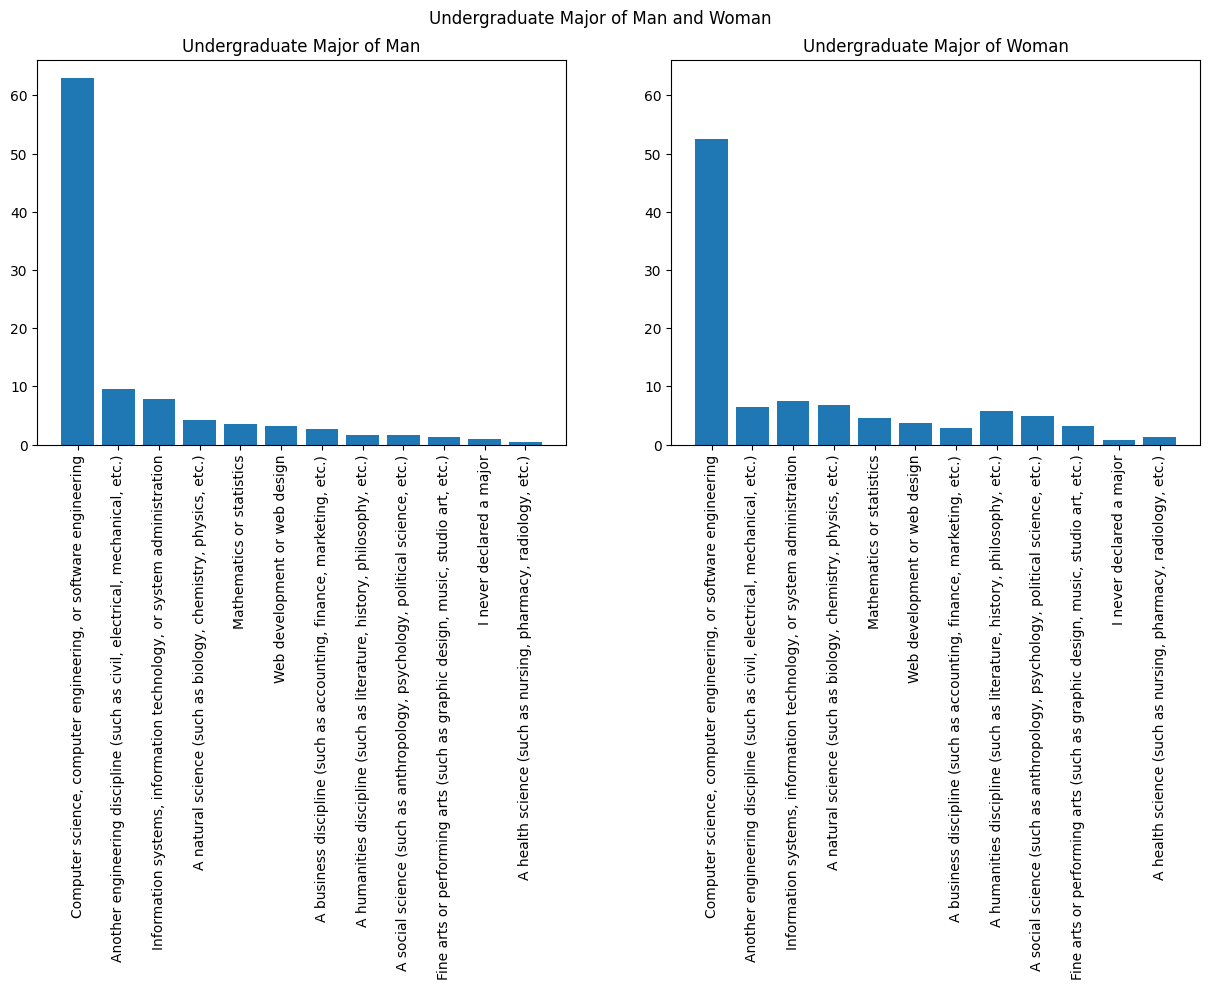

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Undergraduate Major of Man and Woman")

ax1.bar(undergrad_man.index, undergrad_man.values)
ax1.set_title("Undergraduate Major of Man")
ax1.xaxis.set_tick_params(rotation=90)

ax2.bar(undergrad_woman.index, undergrad_woman.values)
ax2.set_title("Undergraduate Major of Woman")
ax2.xaxis.set_tick_params(rotation=90)

ax2.set_ylim(ax1.get_ylim())

plt.show()

**Formal Education Importance**

In [70]:
new_ed_impt = survey_df["NEWEdImpt"].value_counts()
new_ed_impt = new_ed_impt*100/new_ed_impt.sum()

Text(0, 0.5, 'Importance')

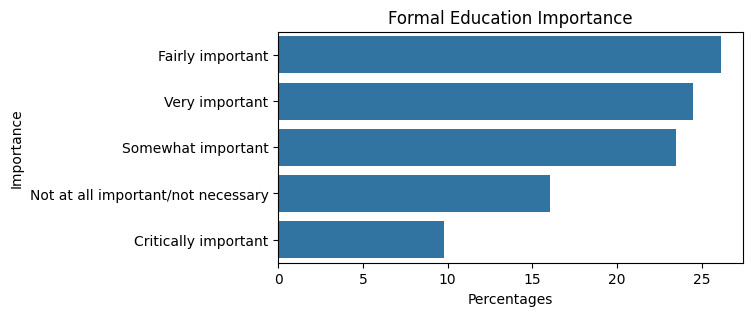

In [72]:
plt.figure(figsize=(6,3))
sns.barplot(x=new_ed_impt.values, y=new_ed_impt.index)
plt.title("Formal Education Importance")
plt.xlabel("Percentages")
plt.ylabel("Importance")

**Formal Education holders vs Non formal Education holders,   Formal Education Importance**

In [83]:
new_ed_impt_formal = survey_df[~survey_df["EdLevel"].isin(["I never completed any formal education", "Primary/elementary school"]) & survey_df["EdLevel"].notnull()]["NEWEdImpt"].value_counts()
new_ed_impt_formal = new_ed_impt_formal*100/new_ed_impt_formal.sum()

new_ed_impt_non_formal = survey_df[survey_df["EdLevel"].isin(["I never completed any formal education", "Primary/elementary school"])]["NEWEdImpt"].value_counts()
new_ed_impt_non_formal = new_ed_impt_non_formal*100/new_ed_impt_non_formal.sum()

new_ed_impt_non_formal = new_ed_impt_non_formal.reindex(new_ed_impt_formal.index)

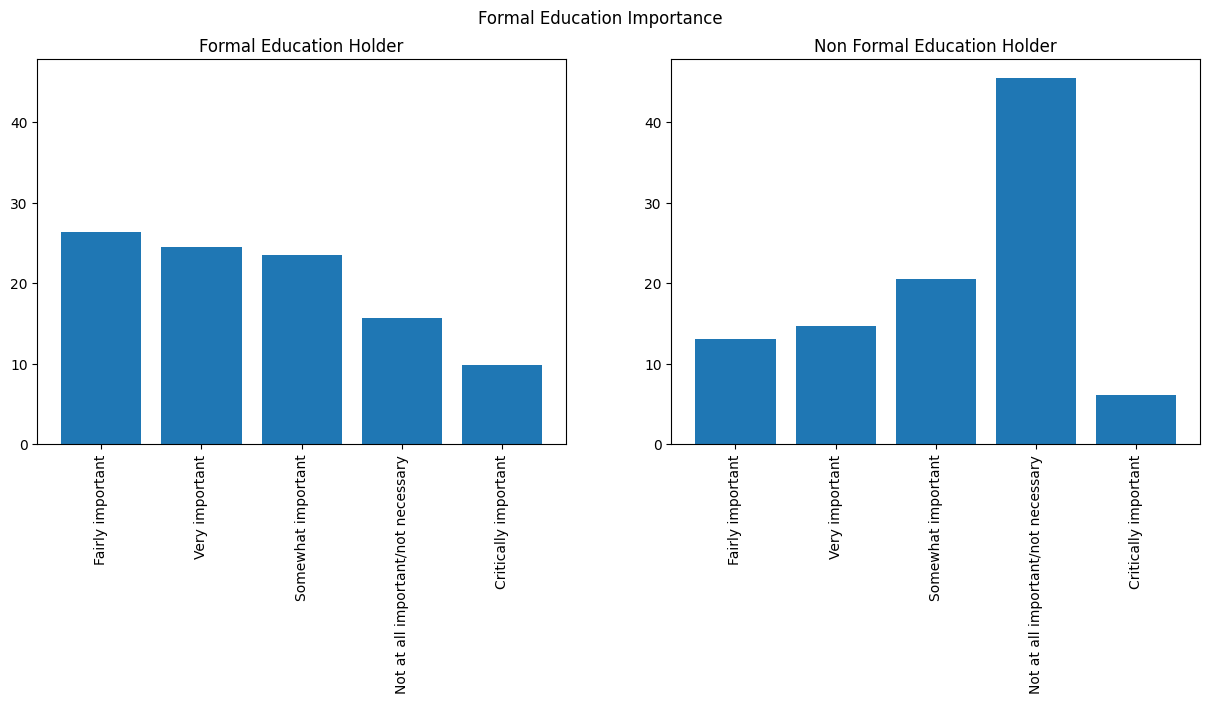

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Formal Education Importance")

ax1.bar(new_ed_impt_formal.index, new_ed_impt_formal.values)
ax1.set_title("Formal Education Holder")
ax1.xaxis.set_tick_params(rotation=90)

ax2.bar(new_ed_impt_non_formal.index, new_ed_impt_non_formal.values)
ax2.set_title("Non Formal Education Holder")
ax2.xaxis.set_tick_params(rotation=90)

ax1.set_ylim(ax2.get_ylim())

plt.show()

## **Demographics**

**Ethnicity amoung stackflow users**

In [125]:
ethnicity_df = split_multi_responses(survey_df["Ethnicity"])

In [126]:
ethnicity_per = ethnicity_df.sum().sort_values(ascending=False)*100/ethnicity_df.sum().sum()

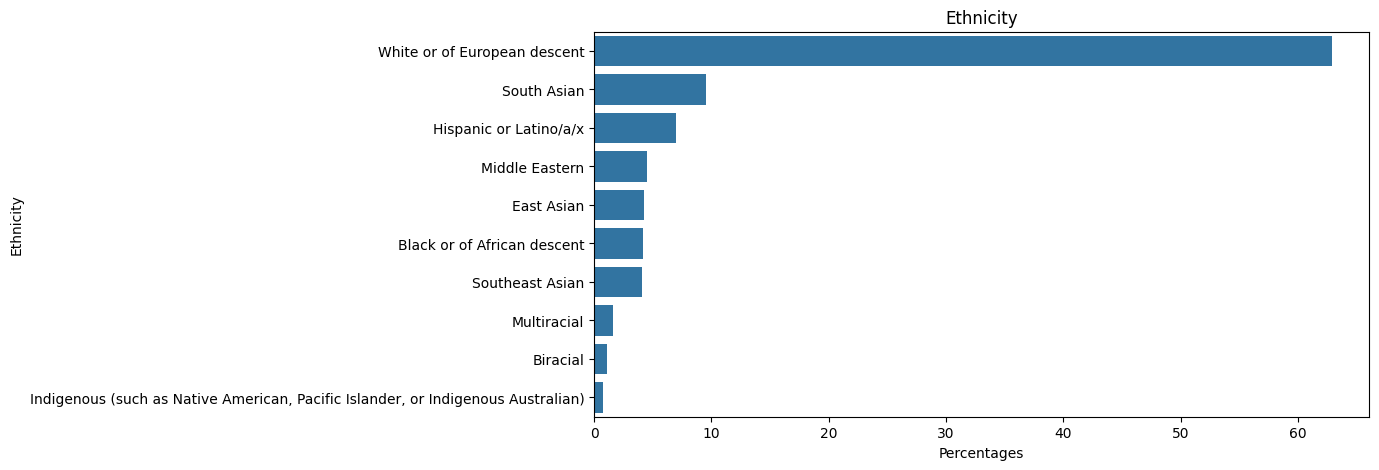

In [127]:
plt.figure(figsize=(10,5))
sns.barplot(x=ethnicity_per.values, y=ethnicity_per.index)
plt.title("Ethnicity")
plt.xlabel("Percentages")
plt.ylabel("Ethnicity")
plt.show()

**Gender Percentage**

In [101]:
gender = survey_df["Gender"].value_counts()
gender_per = gender*100/gender.sum()

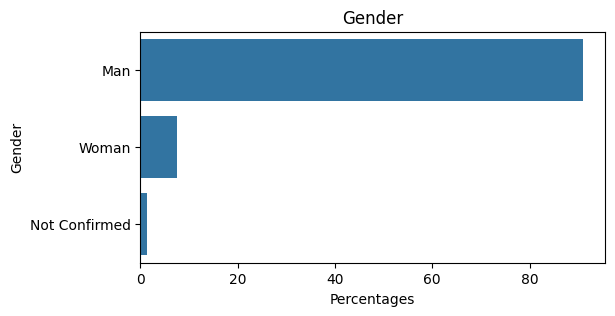

In [103]:
plt.figure(figsize=(6,3))
sns.barplot(x=gender_per.values, y=gender_per.index)
plt.title("Gender")
plt.xlabel("Percentages")
plt.ylabel("Gender")
plt.show()

**Females in Different Ethnicity**

In [128]:
ethnicity_df["Gender"] = survey_df["Gender"]

In [131]:
ethnicities = ethnicity_df.columns[:-1]
ethnicity_woman = pd.DataFrame(columns=("Ethnicity", "Count"))
i = 0

for ethnicity in ethnicities:
  count = ethnicity_df[ethnicity_df["Gender"] == "Woman"][ethnicity].sum()
  ethnicity_woman.loc[i] = [ethnicity, count]
  i = i+1

In [134]:
ethnicity_woman

,Ethnicity,Count
0,White or of European descent,2275
1,Hispanic or Latino/a/x,253
2,East Asian,226
3,Black or of African descent,214
4,Middle Eastern,166
5,"Indigenous (such as Native American, Pacific I...",39
6,South Asian,264
7,Multiracial,72
8,Biracial,69
9,Southeast Asian,182


In [138]:
ethnicity_df[-1].sum()

KeyError: -1